In [1]:
# For being able to use cv2 package (if it's not working)
# pip install opencv-python

In [2]:
import os
import glob

import cv2

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import LSTM
from keras.layers import GaussianNoise

In [3]:
path='./data/fruits-360_dataset/fruits-360'
os.listdir(path)

['.DS_Store',
 'LICENSE',
 'Test',
 'papers',
 'Training',
 'readme.md',
 'test-multiple_fruits']

In [4]:
training_path='./data/fruits-360_dataset/fruits-360/Training'
# validation_path='./data/fruits-360_dataset/fruits-360/Validation'
test_path='./data/fruits-360_dataset/fruits-360/Test'

print(f"{training_path}\n"
#+ f"{validation_path}\n"
+ f"{test_path}")

./data/fruits-360_dataset/fruits-360/Training
./data/fruits-360_dataset/fruits-360/Test


In [5]:
len(os.listdir(training_path)), len(os.listdir(test_path))

(132, 132)

In [6]:
print(os.listdir(training_path))

['Tomato 4', 'Apple Red Delicious', 'Tomato 3', 'Huckleberry', 'Blueberry', 'Pear Red', 'Banana Lady Finger', 'Melon Piel de Sapo', 'Pear', 'Cherry 1', 'Strawberry', 'Nut Forest', 'Avocado', 'Tomato 2', 'Pomegranate', 'Dates', 'Carambula', 'Potato Red Washed', '.DS_Store', 'Granadilla', 'Kohlrabi', 'Tamarillo', 'Pepper Red', 'Fig', 'Ginger Root', 'Kiwi', 'Cherry Wax Yellow', 'Lemon', 'Guava', 'Apple Golden 2', 'Pear Stone', 'Apple Red 1', 'Cauliflower', 'Mandarine', 'Quince', 'Strawberry Wedge', 'Pear Monster', 'Raspberry', 'Pitahaya Red', 'Nut Pecan', 'Apple Golden 3', 'Redcurrant', 'Apple Red Yellow 1', 'Pepper Yellow', 'Grape Pink', 'Banana Red', 'Cucumber Ripe 2', 'Physalis', 'Cherry Rainier', 'Maracuja', 'Chestnut', 'Plum', 'Potato Sweet', 'Cucumber Ripe', 'Hazelnut', 'Nectarine', 'Cherry Wax Black', 'Cantaloupe 2', 'Lychee', 'Pepper Orange', 'Clementine', 'Watermelon', 'Pear Kaiser', 'Mangostan', 'Cherry 2', 'Pineapple Mini', 'Rambutan', 'Grape White', 'Tomato Yellow', 'Apple Bra

In [7]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(training_path, target_size=(224,224))

Found 67692 images belonging to 131 classes.


In [8]:
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path, target_size=(224,224))

Found 22688 images belonging to 131 classes.


In [9]:
imgs,labels=next(train_batches)
np.shape(imgs)

(32, 224, 224, 3)

In [10]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


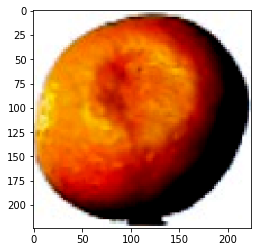

In [11]:
plt.imshow(imgs[25])

In [12]:
mobile_net=tf.keras.applications.mobilenet.MobileNet()
mobile_net.summary()

2022-07-29 09:58:14.447061: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [13]:
len(labels), len(mobile_net.layers)

(32, 91)

In [14]:
# for layer in mobile_net.layers:
#   print(layer)

In [15]:
model=keras.Sequential()
for layer in mobile_net.layers[:-1]:
  model.add(layer)

In [16]:
for layer in model.layers:
  layer.trainable=False

In [17]:
model.add(tf.keras.layers.Dense(131,activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# model.add(GaussianNoise(0.5))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                          
                                                                 
 conv_dw_1_relu (ReLU)       (None, 112, 112, 32)      0

 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
          

In [18]:
history = model.fit(
    x=train_batches,
    epochs=10,
    steps_per_epoch = len(train_batches.class_indices), # BATCH_SIZE,
    validation_data = test_batches,
    validation_steps = len(test_batches.class_indices), # BATCH_SIZE
    verbose=1
)

Epoch 1/10
131/131 [==============================] - 120s 909ms/step - loss: 2.6906 - accuracy: 0.5606 - val_loss: 0.9929 - val_accuracy: 0.7622
Epoch 2/10
131/131 [==============================] - 119s 913ms/step - loss: 0.3265 - accuracy: 0.9160 - val_loss: 0.5266 - val_accuracy: 0.8729
Epoch 3/10
131/131 [==============================] - 135s 1s/step - loss: 0.1468 - accuracy: 0.9635 - val_loss: 0.4254 - val_accuracy: 0.8938
Epoch 4/10
131/131 [==============================] - 126s 967ms/step - loss: 0.0984 - accuracy: 0.9764 - val_loss: 0.3548 - val_accuracy: 0.9048
Epoch 5/10
131/131 [==============================] - 134s 1s/step - loss: 0.0578 - accuracy: 0.9862 - val_loss: 0.3044 - val_accuracy: 0.9234
Epoch 6/10
131/131 [==============================] - 127s 971ms/step - loss: 0.0363 - accuracy: 0.9926 - val_loss: 0.2404 - val_accuracy: 0.9416
Epoch 7/10
131/131 [==============================] - 122s 936ms/step - loss: 0.0668 - accuracy: 0.9823 - val_loss: 0.3616 - val_a

In [19]:
history.history['val_loss']

[0.9929438233375549,
 0.5266212821006775,
 0.4254360795021057,
 0.354753315448761,
 0.30438748002052307,
 0.24038293957710266,
 0.3615894019603729,
 0.30572932958602905,
 0.25755271315574646,
 0.2044246941804886]

In [20]:
history.history['acc'] = history.history['accuracy']
history.history['val_acc'] = history.history['val_accuracy']

In [21]:
model.evaluate(test_batches)

709/709 [==============================] - 363s 512ms/step - loss: 0.2072 - accuracy: 0.9490


[0.20722483098506927, 0.9490038752555847]

In [22]:
def diagnostic_learning_curves(history = history):
    
    # Retrieve a list of accuracy results on training and validation data sets for each training epoch
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    # Retrieve a list of list results on training and validation data sets for each training epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs : 1 -> n_epochs
    epochs = range(1, len(loss) + 1)

    # Plot training and validation accuracy per epoch
    plt.figure(figsize = (20, 10))
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper left')
    
    plt.figure(figsize = (20, 10))

    # Plot training and validation loss per epoch
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper right')

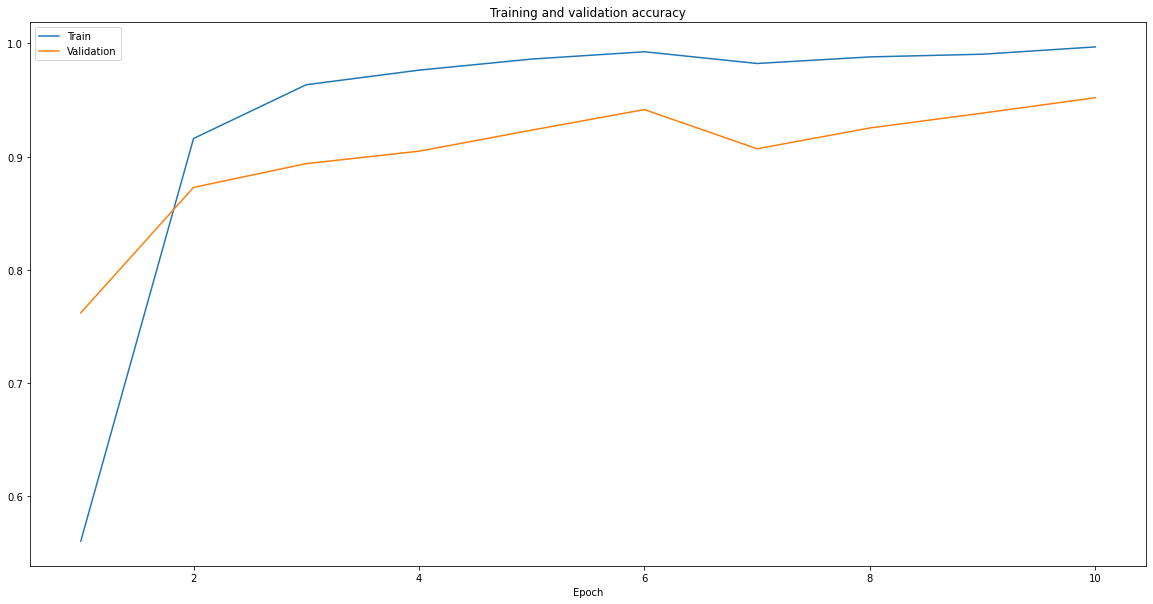

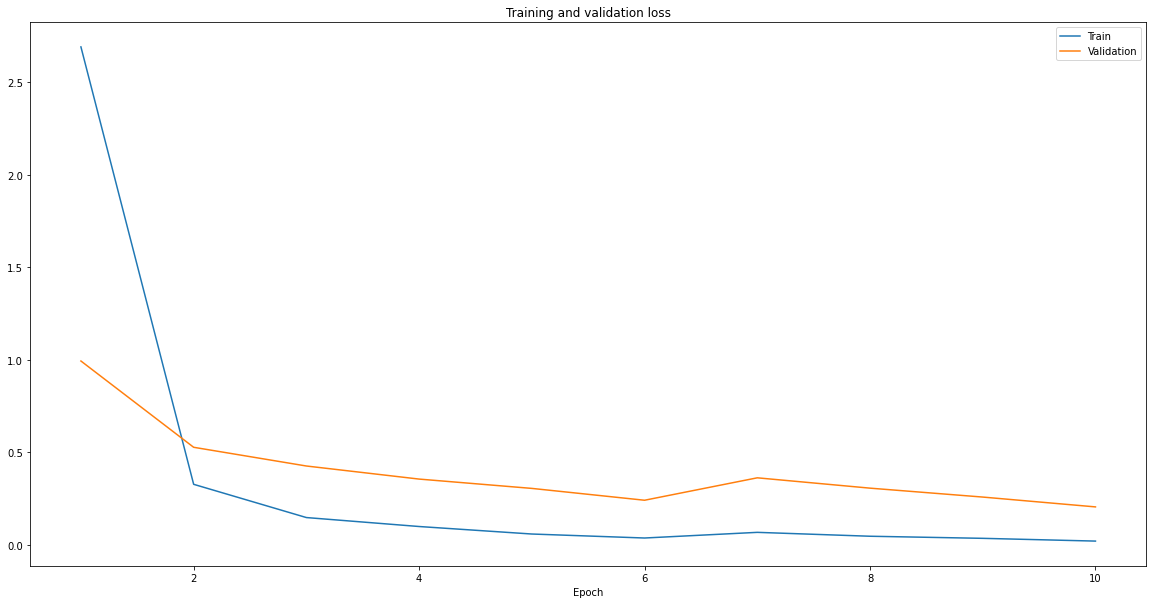

In [23]:
diagnostic_learning_curves(history)